## K-Means Clustering
1. Select at random K points (centroids)
2. Assign datapoints to centroids (forms K clusters)
3. Move centroids to the mean of their clusters
4. Repeat steps 2-4 until centroids do not change

Randomly selected centroids can impact the results; addressed through K-means++

## How to Select K
Within Cluster Sum of Squares (WCSS) by K-means: sum of squared distances of each point to its centroid  
Ideal K minimizes WCSS, but too many clusters can lead to overfitting where each point is its own cluster  
Elbow method: plot WCSS vs K and select the K that sharply reduces WCSS

## Import Libraries

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Dataset

In [13]:
dataset = pd.read_csv("datasets/mall_customers.csv")
X = dataset.iloc[:, 2:].values

## Elbow Method

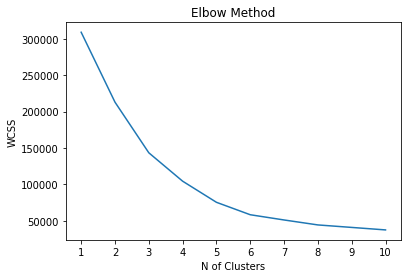

In [11]:
from sklearn.cluster import KMeans

X_grid = range(1, 11)

wcss = []
for i in X_grid:
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

plt.plot(X_grid, wcss)
plt.xticks(X_grid)

plt.title("Elbow Method")
plt.xlabel("N of Clusters")
plt.ylabel("WCSS")

plt.show()

## Create Model

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans.fit(X)

5


## Visualize Results

In [33]:
from matplotlib import animation

y_clusters = kmeans.predict(X)

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection="3d")

scatters = []

for i in range(kmeans.n_clusters):
    scatters.append(ax.scatter(X[y_clusters == i, 0], X[y_clusters == i, 1], X[y_clusters == i, 2], s=40, alpha=0.5, label=f"cluster {i}"))

ax.set_title("K-Means Clustering")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")

def init():
    ax.view_init(elev=10., azim=0)
    return scatters

def animate(i):
    ax.view_init(elev=10., azim=i)
    return scatters

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
anim.save("basic_animation.mp4", fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()